E-commerce Data:
  UserID ProductID  Rating   Timestamp  Category
0   U000     P0009       5  2024-09-08     Books
1   U000     P0020       1  2024-09-02      Home
2   U000     P0012       4  2024-10-18     Books
3   U000     P0013       1  2024-09-18  Clothing
4   U000     P0070       4  2024-09-16      Toys

Product Details:
  ProductID      ProductName     Category
0     P0000      Toys Item 0     Clothing
1     P0001  Clothing Item 1  Electronics
2     P0002     Books Item 2  Electronics
3     P0003  Clothing Item 3  Electronics
4     P0004  Clothing Item 4  Electronics


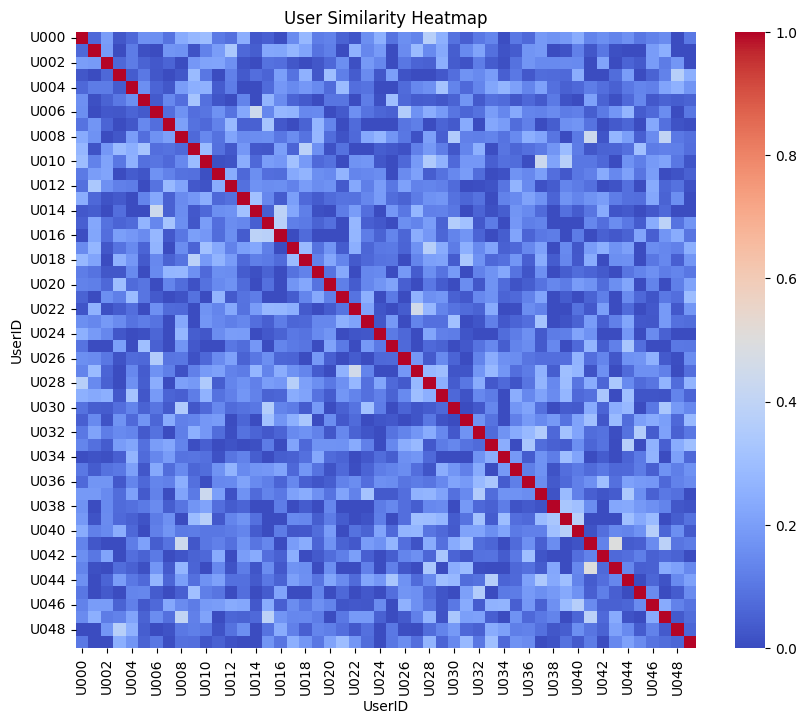

Top recommendations for user U000:
   ProductID          ProductName     Category
29     P0029        Books Item 29  Electronics
51     P0051         Home Item 51     Clothing
58     P0058         Toys Item 58       Beauty
64     P0064  Electronics Item 64  Electronics
70     P0070       Beauty Item 70         Toys


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
ecommerce_data = pd.read_csv("ecommerce_user_data.csv")
product_details = pd.read_csv("product_details.csv")

# Display first few rows of each dataset
print("E-commerce Data:")
print(ecommerce_data.head())
print("\nProduct Details:")
print(product_details.head())

# Data Cleaning & Preprocessing
# Check for missing values
ecommerce_data.dropna(inplace=True)
product_details.dropna(inplace=True)

# Convert user-item interactions into a user-item matrix
user_item_matrix = ecommerce_data.pivot_table(index='UserID', columns='ProductID', values='Rating', fill_value=0)

# Compute Cosine Similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Visualizing User Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df, cmap='coolwarm', annot=False)
plt.title("User Similarity Heatmap")
plt.show()

# Recommend top-N products for a given user based on similar users
def get_recommendations(user_id, top_n=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:]
    top_similar_user = similar_users.idxmax()

    top_products = user_item_matrix.loc[top_similar_user].sort_values(ascending=False).index[:top_n]
    return product_details[product_details['ProductID'].isin(top_products)]

# Example usage
example_user = user_item_matrix.index[0]
recommendations = get_recommendations(example_user)
print(f"Top recommendations for user {example_user}:")
print(recommendations)
